CSC 475 Assignment 2 - Christian Knowles V00874629 This submission will attempt all problems

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import timeit as ti
import IPython.display as ipd

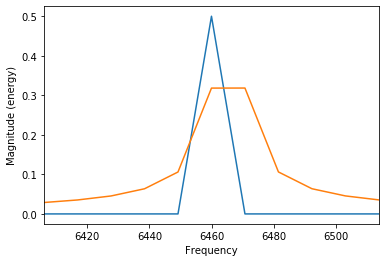

In [2]:
#Question 1: Plotting DFT of sin waves
#Plotting the two sin wave with linear scaling on y-axis
    
N = 2048
s_rate = 22050
n = np.arange(0,N)

k=600
x1 = np.sin(k*n*2*np.pi/N)

k=600.5
x2 = np.sin(k*n*2*np.pi/N)

#plotting real part of magnitude spectrum at sampling rate of sin wave with rectangular window
#note: plt.magnitude_spectrum() implements fft on whatever sin wave it takes in and then plots the magnitude spectrum
plt.magnitude_spectrum(x1, s_rate, sides='onesided', window=np.ones(x1.shape))
plt.magnitude_spectrum(x2, s_rate, sides='onesided', window=np.ones(x2.shape))
plt.xlim(595*(s_rate/N), 605*(s_rate/N))
plt.show()

For the sin wave whose frequency lies at bin 600, all the energy is concentrated at bin 600.  For the sin wave whose frequency lies at bin 600.5, its energy peaks at bin 600 and 601, with the remainder spreading across the frequency spectrum (this is an example of spectral leakage).  Since the frequency is exactly between bin 600 and 601, the leakage is symmetrical.

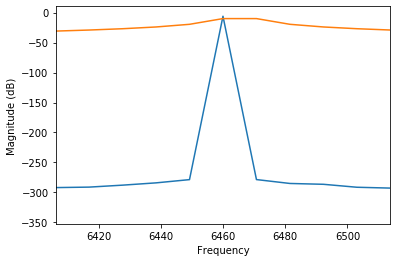

In [3]:
#Plotting the two sin wave with y-axis as decibels
plt.magnitude_spectrum(x1, s_rate, sides='onesided', window=np.ones(x1.shape), scale='dB')
plt.magnitude_spectrum(x2, s_rate, sides='onesided', window=np.ones(x2.shape), scale='dB')
plt.xlim(595*(s_rate/N), 605*(s_rate/N))
plt.show()

The spectral leakage that is caused from the sin wave whose frequency is in between bin 600 and 601 creates a lot more noise than it seems when the plot is converted to dB.  If the sin wave was converted back into an audio signal, there would be audible noise across the frequency spectrum.

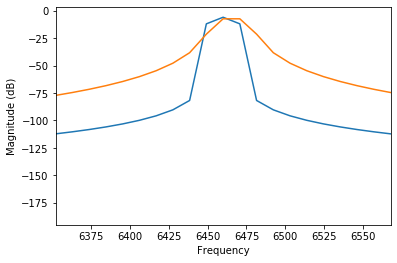

In [4]:
#Plotting the two sin wave with y-axis as decibels and using hanning window function
plt.magnitude_spectrum(x1, s_rate, sides='onesided', window=np.hanning(2048), scale='dB')
plt.magnitude_spectrum(x2, s_rate, sides='onesided', window=np.hanning(2048), scale='dB')
plt.xlim(590*(s_rate/N), 610*(s_rate/N))
plt.show()

With the hanning window function, it's clear that the spectral leakage has reduced significantly (looking at the entire frequency spectrum gives us an idea of how much the leakage has decreased).  However, some leakage has been introduced into the sin wave at dft bin 600, but it has much less leakage than the other signal.

In [5]:
#Question 2 part 1: Modified DFT function

def pedagogical_dft(x, N):     
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N): 
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N)   # inner product with imaginary basis k
    return (X_re, X_im)

#modified dft moving fequency calculation to outer loop
def improved_dft(x, N):
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N):
        frequency = k * 2 * np.pi
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos((t * frequency) / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin((t * frequency) / N)   # inner product with imaginary basis k
    return (X_re, X_im)

print()

In [6]:
#Question 2 part 2: Comparing time of DFT functions

#measure 100 instances of pedagogical_dft
time1 = ti.timeit('pedagogical_dft(noise, 512)', setup='''from __main__ import pedagogical_dft
import numpy as np
noise = np.random.normal(0, 1.0, 44100)''', number=5)

#measure 100 instances of improved_dft
time2 = ti.timeit('improved_dft(noise, 512)', setup='''from __main__ import improved_dft
import numpy as np
noise = np.random.normal(0, 1.0, 44100)''', number=5)

#measure 100 instances of fft
time3 = ti.timeit('np.fft.fft(noise, n=512)', setup='''import numpy as np
noise = np.random.normal(0, 1.0, 44100)''', number=5)

print("Time for pedagogical_dft: %f seconds." % (time1))
print("Time for improved_dft: %f seconds." % (time2))
print("Time for fft: %f seconds." % (time3))

Time for pedagogical_dft: 17.087073 seconds.
Time for improved_dft: 16.408781 seconds.
Time for fft: 0.000188 seconds.


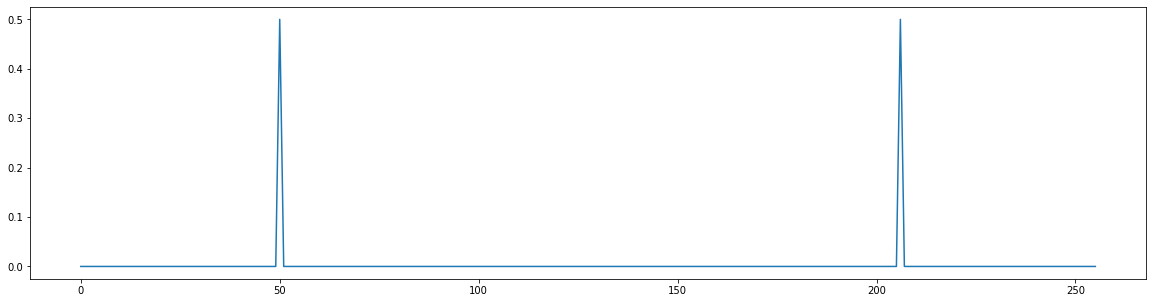

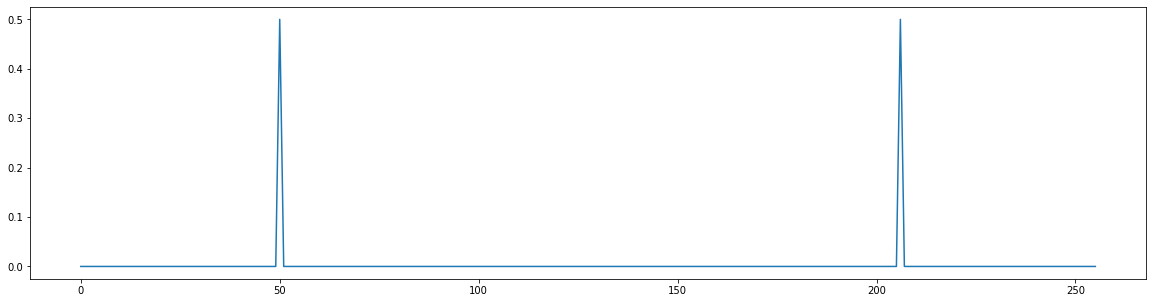

In [10]:
#Question 2 part 3: Adding basis for DFT in function

def modified_dft(x, N, frequencies):
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N):
        for t in np.arange(0,N):
            X_re[k] += x[t] * np.cos(t * 2 * np.pi * frequencies[k])
            X_im[k] += x[t] * np.sin(t * 2 * np.pi * frequencies[k])
    return (X_re, X_im)

# Single sinusoid 
k=50
x1 = 0.5 * np.sin(k*n*2*np.pi/N)

#Checking if plots look the same
def plot_mag_spectrum(Xmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)
    
N=256

basis_frequencies = []
for x in np.arange(0, N):
    basis_frequencies.append(x / N)

(X_re1, X_im1) = pedagogical_dft(x1, N)
(X_re2, X_im2) = modified_dft(x1, N, basis_frequencies)

Xmag1 = 2 * np.sqrt(X_re2 * X_re2 + X_im2 * X_im2) /N
Xmag2 = 2 * np.sqrt(X_re2 * X_re2 + X_im2 * X_im2) /N
#Comparing the results of the two different functions on a plot to see if they're the same
plot_mag_spectrum(Xmag1)
plot_mag_spectrum(Xmag2)

In [11]:
#Question 2 part 4: Octave transform
def octaveTransform(signal, srate, N):
    fundamental = srate / N
    basis_frequencies = []
    i = 1
    while i <= N:
        basis_frequencies[i-1] = fundamental * i
        i *= 2
    return modified_dft(x, N, basis_frequencies)

srate = 44100
N = 2048

# Single sinusoid (one second)
k=50
x1 = 0.5 * np.sin(k*n*2*np.pi/N)

(X_re, X_im) = octaveTransform(x1, srate, N)

Xmag1 = 2 * np.sqrt(X_re * X_re + X_im * X_im) /N
plot_mag_spectrum(Xmag1)

In [7]:
#Question 3 part 1: Audio of 'ah' sound
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

srate=44100

componentA = sinusoid(freq=200.0, dur=3.0, amp=0.12226, phase=1.508)
componentB = sinusoid(freq=400.0, dur=3.0, amp=0.29416, phase=1.876)
componentC = sinusoid(freq=500.0, dur=3.0, amp=0.48836, phase=-0.185)

vowel_sound = componentA + componentB + componentC
ipd.Audio(vowel_sound,rate=srate)

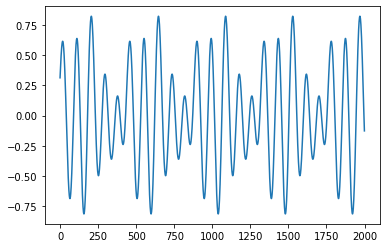

In [14]:
#Question 3 part 1: Plotting vowel sound and components
plt.plot(vowel_sound[0:2000])
plt.show()

Now I'll show the components broken down by component

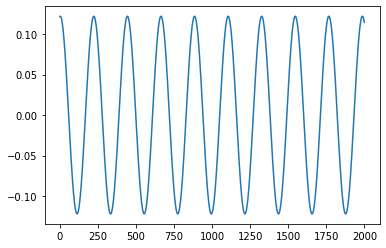

In [15]:
#first component with magnitude only (since component at 100Hz has no magnitude)
plt.plot(componentA[0:2000])
plt.show()

The first component simply looks like a sinusoid with frequency 200Hz.  The next non-zero component is at 400Hz.

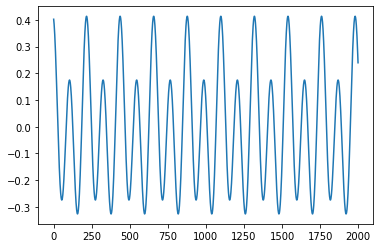

In [16]:
#add first two components together
componentAB = componentA + componentB
plt.plot(componentAB[0:2000])
plt.show()

Combining two periodic waveforms created another periodic waveform.  Because of the 2:1 relationship the two waveforms have in terms of frequency, the period of their combination is the same as the 200Hz waveform.

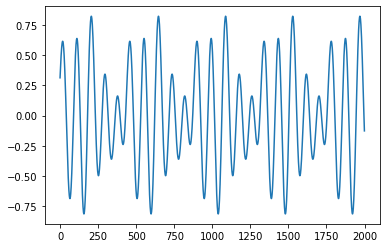

In [17]:
#All three combined together (200Hz, 400Hz, 500Hz components)
plt.plot(vowel_sound[0:2000])
plt.show()

Combining three periodic waveforms will create another periodic waveform, but its period will be longer since the the lowest common denominator of the three periods is greater (1/200, 1/400, and 1/500 respectively).